Name: Felix Ng

# Exploration

In [1]:
import pandas as pd
test = pd.read_csv("test.csv");
train = pd.read_csv("train.csv");
train.head()

,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,uniqueid_8538,No,Rural,Yes,4.0,30,Male,Head of Household,Married/Living together,No formal education,Informally employed
1,uniqueid_2907,No,Rural,Yes,1.0,65,Female,Head of Household,Widowed,No formal education,Farming and Fishing
2,uniqueid_5821,No,Rural,Yes,3.0,49,Female,Spouse,Married/Living together,Secondary education,Informally employed
3,uniqueid_2480,No,Urban,Yes,4.0,32,Female,Spouse,Married/Living together,Primary education,Self employed
4,uniqueid_316,No,Rural,Yes,7.0,36,Female,Spouse,Married/Living together,Primary education,Informally employed


Balance data so there is no bias, apply to train and not to test.

<AxesSubplot:xlabel='bank_account', ylabel='Count'>

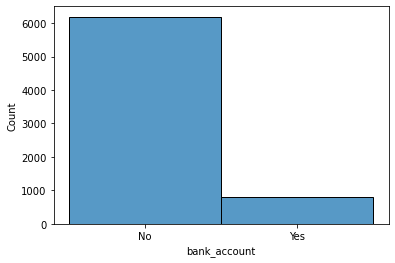

In [2]:
#0 == NO, 1 == YES
import seaborn as sns 
sns.histplot(data=train["bank_account"])

In [3]:
Yes = train[train["bank_account"]=="Yes"]
No = train[train["bank_account"]=="No"]
print(Yes.shape,No.shape)

(802, 11) (6186, 11)


In [4]:
!pip install imblearn  
#balancing resumes after processing 

What we want to predict == target column == bank_account

In [5]:
#split data 
x_train = train.drop("bank_account", axis="columns")
y_train = train["bank_account"].copy()

x_test = test.drop("bank_account", axis="columns")
y_test = test["bank_account"].copy()

uniqueid has nothing to do with us trying to find out if there is bank account or not 

In [6]:
# drop features
x_train = x_train.drop(columns=["uniqueid"], axis=1)
x_test = x_test.drop(columns=["uniqueid"], axis=1)

From here what ever we do to training set we do to test set but we only do this to the x variables because y is our target

array([[<AxesSubplot:title={'center':'household_size'}>,
        <AxesSubplot:title={'center':'age_of_respondent'}>]], dtype=object)

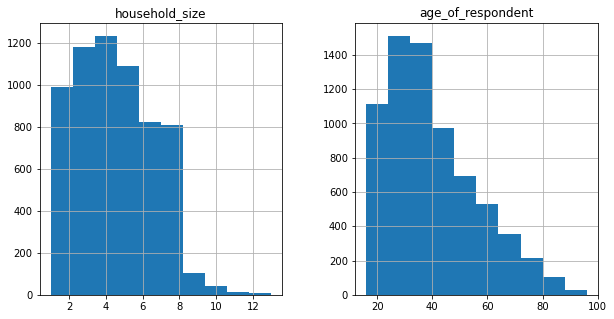

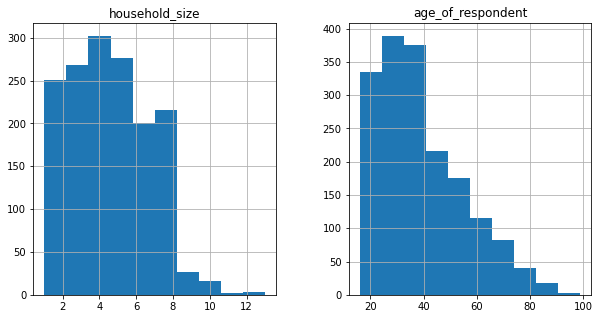

In [7]:
x_train.hist(figsize=(10,5))
x_test.hist(figsize=(10,5))
#There is only 2 histograms being displayed 

This makes sense since only those two features are numeric so we have limited numerical analysis 
There are 687(6988 - 6301) missing values from household_size which we need to either drop or replace. 

If there is alot of missing values then all columns need to be the same length so we would be abandoning alot of other 
valuable information from other features so its better to impute those missing values. 
If there was very few then we can just drop them. 

If the feature with many missing values is a numerical feature then we want to impute using the median 
since it is resistent to skew and outliers. If its a categorical feature then we use the mode 
which is the value that appears most often in the feature because we can't find mean or medians from a non numerical feature.

In [8]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988 entries, 0 to 6987
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_type           6988 non-null   object 
 1   cellphone_access        6988 non-null   object 
 2   household_size          6301 non-null   float64
 3   age_of_respondent       6988 non-null   int64  
 4   gender_of_respondent    6988 non-null   object 
 5   relationship_with_head  6988 non-null   object 
 6   marital_status          6988 non-null   object 
 7   education_level         6988 non-null   object 
 8   job_type                6988 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 491.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_type           1747 n

Most of the features have very low number of unique values apart from household_size and age_of_respondent 
this means that when using onehotencoding we won't have an extremely large dataset

In [9]:
print(x_train.nunique())
print(x_test.nunique())

location_type              2
cellphone_access           2
household_size            13
age_of_respondent         80
gender_of_respondent       2
relationship_with_head     6
marital_status             4
education_level            6
job_type                   9
dtype: int64
location_type              2
cellphone_access           2
household_size            13
age_of_respondent         77
gender_of_respondent       2
relationship_with_head     6
marital_status             4
education_level            6
job_type                   9
dtype: int64


# Preprocessing 

In [10]:
#convert y train and test to binary numerical 
def bconvert(ls):
    ls = list(ls)
    new = []
    for i in ls:
        if i == "No":
            new.append(0)
        else:
            new.append(1)
    return new
y_train = bconvert(y_train)
y_test = bconvert(y_test)
print(y_train[:10])
print(y_test[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]


Handle missing values first. 

This will means that the normal x_train and x_test can be used instead of the prepared version 

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
])

x_train_prepared = data_transform_pipeline.fit_transform(x_train[["household_size"]]) #needed 2d array
x_test_prepared = data_transform_pipeline.fit_transform(x_test[["household_size"]]) 
x_test[["household_size"]] = x_test_prepared
x_train[["household_size"]] = x_train_prepared

display(pd.DataFrame(x_train_prepared))
display(pd.DataFrame(x_test_prepared))
print(x_train.info()) #missing values handled 
print(x_train.isnull().sum())
print(x_test.info()) 
print(x_test.isnull().sum())

,0
0,4.0
1,1.0
2,3.0
3,4.0
4,7.0
...,...
6983,3.0
6984,5.0
6985,2.0
6986,5.0


,0
0,4.0
1,3.0
2,6.0
3,3.0
4,3.0
...,...
1742,4.0
1743,4.0
1744,2.0
1745,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6988 entries, 0 to 6987
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location_type           6988 non-null   object 
 1   cellphone_access        6988 non-null   object 
 2   household_size          6988 non-null   float64
 3   age_of_respondent       6988 non-null   int64  
 4   gender_of_respondent    6988 non-null   object 
 5   relationship_with_head  6988 non-null   object 
 6   marital_status          6988 non-null   object 
 7   education_level         6988 non-null   object 
 8   job_type                6988 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 491.5+ KB
None
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type          

Dropping redundent elements from features. low variance features should be dropped. low variance means not much correlation and vice versa. In this case since Education level Other/Dont know/RTA is ordinal categorical we need to replace the missing values with the mode. Otherwise we will end up with having to delete information.

We need to balance the data so there is no bias 

In [12]:
x_train=x_train.replace('Other/Dont know/RTA', x_train['education_level'].mode()[0])
x_test=x_test.replace('Other/Dont know/RTA', x_test['education_level'].mode()[0])
print(x_train['education_level'].unique())
print(x_test['education_level'].unique())

['No formal education' 'Secondary education' 'Primary education'
 'Tertiary education' 'Vocational/Specialised training']
['Secondary education' 'No formal education' 'Primary education'
 'Tertiary education' 'Vocational/Specialised training']


Encoding Transformer for columns

In [13]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#numerical_columns = ["age_of_respondent"]
categorical_columns = ["location_type", "cellphone_access", "gender_of_respondent","relationship_with_head","marital_status","job_type"] #excluded uniqueid to many unique values
ordinal_columns = ["household_size", "education_level"]

#numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(sparse=False, handle_unknown="ignore")
ordinal_preprocessor = OrdinalEncoder()

preprocessor = ColumnTransformer([
    #('standard-scaler', numerical_preprocessor, numerical_columns),
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('ordinal-encoder', ordinal_preprocessor, ordinal_columns)
])

x_train_prepared = preprocessor.fit_transform(x_train) 
x_train_prepared = pd.DataFrame(x_train_prepared)
x_train_prepared.columns = preprocessor.get_feature_names_out()

x_test_prepared = preprocessor.fit_transform(x_test) 
x_test_prepared = pd.DataFrame(x_test_prepared)
x_test_prepared.columns = preprocessor.get_feature_names_out()

Now we need to replace x_train and x_test with the prepared data but first we must rename the columns in order to replace the data set 

In [14]:
#renaming all the columns 
def Cconvert(d):
    ls = list(d.columns.values)
    new_ls = []
    substring1 = "standard-scaler__" 
    substring2 = "one-hot-encoder__" 
    substring3 = "ordinal-encoder__" 
    for s in ls: #through all columns 
        if(not s.find(substring1)):
            print(s)
            new_s = s.replace("standard-scaler__","")
            new_ls.append(new_s)
        if(not s.find(substring2)):
            print(s)
            new_s = s.replace("one-hot-encoder__","")
            new_ls.append(new_s)
        if(not s.find(substring3)):
            print(s)
            new_s = s.replace("ordinal-encoder__","")
            new_ls.append(new_s)
    print(len(new_ls))
    d.columns = new_ls
    display(d)
    return d
x_train = Cconvert(x_train_prepared)
x_test = Cconvert(x_test_prepared)

one-hot-encoder__location_type_Rural
one-hot-encoder__location_type_Urban
one-hot-encoder__cellphone_access_No
one-hot-encoder__cellphone_access_Yes
one-hot-encoder__gender_of_respondent_Female
one-hot-encoder__gender_of_respondent_Male
one-hot-encoder__relationship_with_head_Child
one-hot-encoder__relationship_with_head_Head of Household
one-hot-encoder__relationship_with_head_Other non-relatives
one-hot-encoder__relationship_with_head_Other relative
one-hot-encoder__relationship_with_head_Parent
one-hot-encoder__relationship_with_head_Spouse
one-hot-encoder__marital_status_Divorced/Seperated
one-hot-encoder__marital_status_Married/Living together
one-hot-encoder__marital_status_Single/Never Married
one-hot-encoder__marital_status_Widowed
one-hot-encoder__job_type_Dont Know/Refuse to answer
one-hot-encoder__job_type_Farming and Fishing
one-hot-encoder__job_type_Formally employed Government
one-hot-encoder__job_type_Formally employed Private
one-hot-encoder__job_type_Government Depende

,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_size,education_level
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
6984,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0
6985,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6986,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0


one-hot-encoder__location_type_Rural
one-hot-encoder__location_type_Urban
one-hot-encoder__cellphone_access_No
one-hot-encoder__cellphone_access_Yes
one-hot-encoder__gender_of_respondent_Female
one-hot-encoder__gender_of_respondent_Male
one-hot-encoder__relationship_with_head_Child
one-hot-encoder__relationship_with_head_Head of Household
one-hot-encoder__relationship_with_head_Other non-relatives
one-hot-encoder__relationship_with_head_Other relative
one-hot-encoder__relationship_with_head_Parent
one-hot-encoder__relationship_with_head_Spouse
one-hot-encoder__marital_status_Divorced/Seperated
one-hot-encoder__marital_status_Married/Living together
one-hot-encoder__marital_status_Single/Never Married
one-hot-encoder__marital_status_Widowed
one-hot-encoder__job_type_Dont Know/Refuse to answer
one-hot-encoder__job_type_Farming and Fishing
one-hot-encoder__job_type_Formally employed Government
one-hot-encoder__job_type_Formally employed Private
one-hot-encoder__job_type_Government Depende

,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_size,education_level
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1743,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0
1744,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1745,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0


In [15]:
display(x_train)
display(x_test)

print(x_train.dtypes)
print(x_test.dtypes)

print(x_train.nunique())
print(x_test.nunique())

print(x_train.shape)
print(x_test.shape)

print(len(y_train))
print(len(y_test))

,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_size,education_level
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
6984,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0
6985,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6986,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0


,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_size,education_level
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1743,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0
1744,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1745,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0


location_type_Rural                           float64
location_type_Urban                           float64
cellphone_access_No                           float64
cellphone_access_Yes                          float64
gender_of_respondent_Female                   float64
gender_of_respondent_Male                     float64
relationship_with_head_Child                  float64
relationship_with_head_Head of Household      float64
relationship_with_head_Other non-relatives    float64
relationship_with_head_Other relative         float64
relationship_with_head_Parent                 float64
relationship_with_head_Spouse                 float64
marital_status_Divorced/Seperated             float64
marital_status_Married/Living together        float64
marital_status_Single/Never Married           float64
marital_status_Widowed                        float64
job_type_Dont Know/Refuse to answer           float64
job_type_Farming and Fishing                  float64
job_type_Formally employed G

In [16]:
#feature balancing resumed 
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state=42)
x_res,y_res=smk.fit_resample(x_train,y_train)

In [17]:
print(x_res.shape,len(y_res))
x_train = x_res
y_train = y_res

(12372, 27) 12372


Feature: 0, Score: 0.05697
Feature: 1, Score: 0.05047
Feature: 2, Score: 0.03830
Feature: 3, Score: 0.05233
Feature: 4, Score: 0.02745
Feature: 5, Score: 0.02012
Feature: 6, Score: 0.02231
Feature: 7, Score: 0.02405
Feature: 8, Score: 0.00444
Feature: 9, Score: 0.00296
Feature: 10, Score: 0.00603
Feature: 11, Score: 0.01120
Feature: 12, Score: 0.00912
Feature: 13, Score: 0.02911
Feature: 14, Score: 0.02256
Feature: 15, Score: 0.01015
Feature: 16, Score: 0.00284
Feature: 17, Score: 0.03432
Feature: 18, Score: 0.01849
Feature: 19, Score: 0.01203
Feature: 20, Score: 0.00378
Feature: 21, Score: 0.03918
Feature: 22, Score: 0.01415
Feature: 23, Score: 0.02042
Feature: 24, Score: 0.02838
Feature: 25, Score: 0.20933
Feature: 26, Score: 0.22952


<BarContainer object of 27 artists>

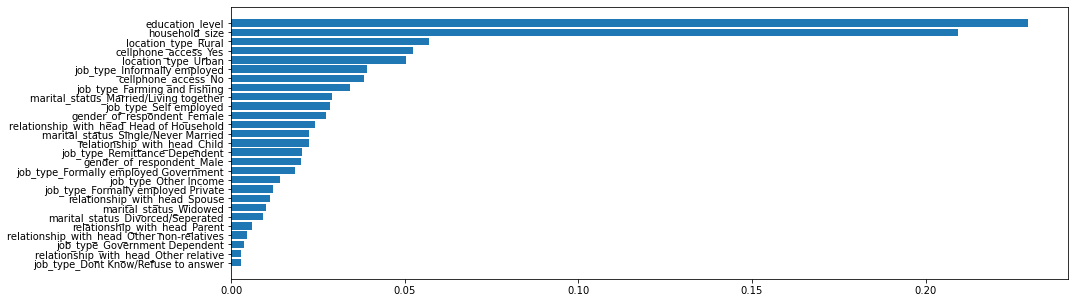

In [18]:
#Feature Selection
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

model = RandomForestClassifier()

model.fit(x_train, y_train)

importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
df=pd.DataFrame({'Feature_names':x_train.columns, 'Importances':model.feature_importances_})

import matplotlib.pyplot as plt

df=df.sort_values(by='Importances')
plt.figure(figsize=(15, 5))
plt.barh(df['Feature_names'], df['Importances'])

In [19]:
df.sort_values(by=["Importances"])

,Feature_names,Importances
16,job_type_Dont Know/Refuse to answer,0.002844
9,relationship_with_head_Other relative,0.002956
20,job_type_Government Dependent,0.003783
8,relationship_with_head_Other non-relatives,0.004442
10,relationship_with_head_Parent,0.006035
12,marital_status_Divorced/Seperated,0.009121
15,marital_status_Widowed,0.010147
11,relationship_with_head_Spouse,0.011200
19,job_type_Formally employed Private,0.012029
22,job_type_Other Income,0.014151


We can see that the most best features are age of respondent, eduction level, and household size. But other features may still have influence so its safer to not remove any features yet.

In [20]:
x_train.drop('job_type_Dont Know/Refuse to answer', axis=1, inplace=True)
x_train.drop('relationship_with_head_Other relative', axis=1, inplace=True)
x_train.drop('job_type_Government Dependent', axis=1, inplace=True)
x_train.drop('relationship_with_head_Other non-relatives', axis=1, inplace=True)
x_train.drop('relationship_with_head_Parent', axis=1, inplace=True)

x_test.drop('job_type_Dont Know/Refuse to answer', axis=1, inplace=True)
x_test.drop('relationship_with_head_Other relative', axis=1, inplace=True)
x_test.drop('job_type_Government Dependent', axis=1, inplace=True)
x_test.drop('relationship_with_head_Other non-relatives', axis=1, inplace=True)
x_test.drop('relationship_with_head_Parent', axis=1, inplace=True)

# Model Choosing 

Try comparing Train to see for over and under fitting by comparing the accuracy scores.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestClassifier

lr_model_train = Pipeline([ 
    ('classifier', LogisticRegression(max_iter=800))
])
lr_model_train.fit(x_train, y_train)
y_train_predicted_lr_train = lr_model_train.predict(x_train)
print(balanced_accuracy_score(y_train, y_train_predicted_lr_train))  

svm_model_train = Pipeline([
 ('classifier', SVR())
])
svm_model_train.fit(x_train, y_train)
print(svm_model_train.score(x_train, y_train)) 

rf_model_train = Pipeline([
    ('classifier', RandomForestClassifier(random_state=0))
])
rf_model_train.fit(x_train, y_train);
print(rf_model_train.score(x_train, y_train))

0.7436146136437116
0.3486786996614888
0.8857904946653734


3 choosen models: SVM, Logistic regression, Random Forest

In [22]:
#Choosen model Logistic regression 
#because we are trying to predict a binary classification problem
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([ #no need to add preprocessor since processed data replaced initial data 
    ('classifier', LogisticRegression(max_iter=800))
])

lr_model.fit(x_train, y_train)

y_test_predicted_lr = lr_model.predict(x_test)
#y_test = y_test_predicted_lr

#accuracy, higher the better 
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_test_predicted_lr))  
print(sum(lr_model.predict_proba(x_test))/len(lr_model.predict_proba(x_test)))

0.7292660243414235
[0.62043257 0.37956743]


In [23]:
from sklearn.svm import SVC 

svm_model = Pipeline([
 ('classifier', SVC()) #fuck why were you using SVR that regression u bloody shitwit
])

svm_model.fit(x_train, y_train)

y_test_predicted_svm = svm_model.predict(x_test)

print(svm_model.score(x_test, y_test))

0.7292501431024614


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ('classifier', RandomForestClassifier(random_state=0))
])

rf_model.fit(x_train, y_train);

y_test_predicted_rf = rf_model.predict(x_test)

print(rf_model.score(x_test, y_test)) 
print(sum(rf_model.predict_proba(x_test))/len(rf_model.predict_proba(x_test)))

0.7933600457927876
[0.78802507 0.21197493]


# Cross Validation
The lower the RMSE the better

In [25]:
#Cross validation using test set
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

print("RMSE on the Logistic Regression test set: %.4f" % np.sqrt(mean_squared_error(y_test, y_test_predicted_lr)))
cv_results = cross_validate(lr_model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-cv_results["test_score"])
print("The mean Logistic Regression cross-validation RMSE is: ", f"{scores.mean():.4f} +/- {scores.std():.4f}")

print("RMSE on the Support Vector Machine test set: %.4f" % np.sqrt(mean_squared_error(y_test, y_test_predicted_svm)))
cv_results = cross_validate(svm_model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-cv_results["test_score"])
print("The mean Support Vector Machine cross-validation RMSE is: ", f"{scores.mean():.4f} +/- {scores.std():.4f}")

print("RMSE on the Random Forest test set: %.4f" % np.sqrt(mean_squared_error(y_test, y_test_predicted_rf)))
cv_results = cross_validate(rf_model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores = np.sqrt(-cv_results["test_score"])
print("The mean Random Forest cross-validation RMSE is: ", f"{scores.mean():.4f} +/- {scores.std():.4f}")


RMSE on the Logistic Regression test set: 0.5070
The mean Logistic Regression cross-validation RMSE is:  0.5063 +/- 0.0120
RMSE on the Support Vector Machine test set: 0.5203
The mean Support Vector Machine cross-validation RMSE is:  0.4967 +/- 0.0098
RMSE on the Random Forest test set: 0.4546
The mean Random Forest cross-validation RMSE is:  0.3821 +/- 0.0456


# Hyper-parameter Tuning 
For Logistic Regression. The failed fits just mean incompatable paramters so it doesn't influence the models accuracy

In [26]:
#hyper-parameter tuning for Logistic Regression 
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'classifier__penalty' : ['l1','l2','elasticnet','none'],
    'classifier__C' : np.logspace(-4,4,20),
    'classifier__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'classifier__max_iter' : [100, 1000, 2500, 5000]}
]

clf = GridSearchCV(lr_model, param_grid = param_grid, cv = 3, verbose = True, n_jobs=-1)
best_clf = clf.fit(x_train, y_train) 

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\User1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User1\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.pena

In [27]:
print(best_clf.best_estimator_)
print("The mean accuracy of the model is: ",best_clf.score(x_test,y_test))

Pipeline(steps=[('classifier', LogisticRegression(C=0.615848211066026))])
The mean accuracy of the model is:  0.7424155695477962


# Metrics Report

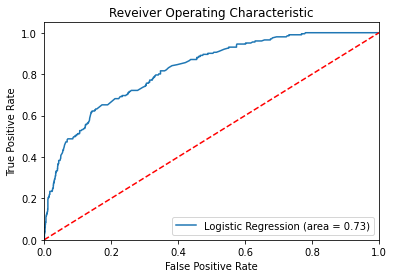

In [28]:
#report AUC-ROC 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test,y_test_predicted_lr)
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(x_test)[:,1])

plt.figure() 
plt.plot(fpr,tpr,label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reveiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

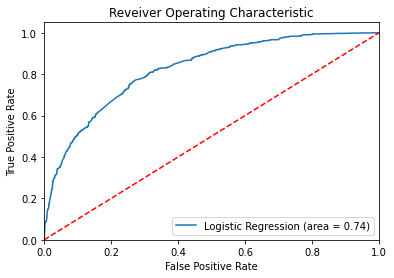

In [29]:
logit_roc_auc = roc_auc_score(y_train,y_train_predicted_lr_train)
fpr, tpr, thresholds = roc_curve(y_train, lr_model.predict_proba(x_train)[:,1])

plt.figure() 
plt.plot(fpr,tpr,label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reveiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

C:\Users\User1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


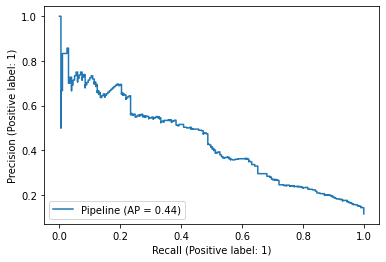

In [30]:
#AUC-PR
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lr_model, x_test, y_test)

Accuracy :  0.7429879793932456
Sensitivity :  0.7470892626131953
Specificity :  0.7114427860696517


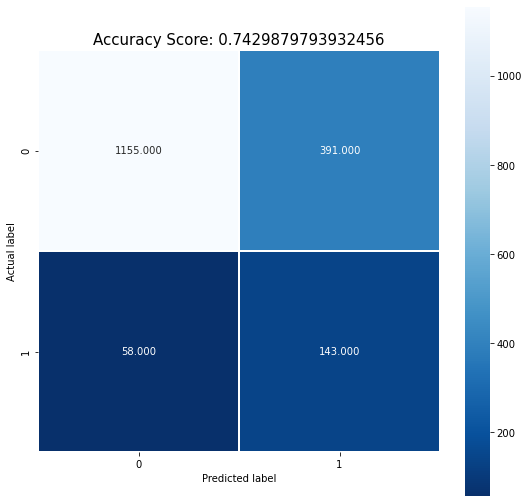

In [31]:
#accuracy, sensitivity, specificity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_test_predicted_lr)
score = lr_model.score(x_test, y_test)
total1=sum(sum(cm))

accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Discussion


I have learnt that the logistic regression is the best model for predicting the probability of having a bank account. This is because Logistic Regression had the highest accuracy score without overfitting. The RMSE score is mostly the same for all the 3 models meaning the accurasies is mostly the same. Using hyper-paramter tuning hardly increased the accuracy of the model so a better parameter was not found. Better feature engineering could help improve the accuracy. The area under the AOC curve is 0.73 meaning based on the test set it has a good ability to identify the individual having a bank account or not. The average precison is 0.44 so the predictions are mostly balanced so its neither always wrong or right. There is a high sensitivity of this model so the model is mostly correctly idenifying the individuals with a bank account. 

Some other things I learned was that when calculating the proportions of individuals with a bank account and no bank account I realised there was significantly more individuals without a bank account compared to those with one. This could of meant that the dataset contained a lot of individuals from a poor country or a poor area in a rich country. This would of trained the models to be better at predicting the individuals without a bank account more so than those with one which is worse accuracy. This is why I balanced it out to prevent this. 

There was only 687 missing values so by removing these values it would of not had a bid impact on the health of my dataset, but it was still safer to replace those values with the mode, which can be used on this categorical data and keeps the other valuable information from other features. However, it is worth noting that using mode isn't always the best option due to the fact that event that caused missing data cos influence what those missing values should be. If it was missing by random then sure we can use mode but if not then we may want to look at using the median which is also resilent to outliers. 

Features that we removed from our training set had also needed to be removed from our test set otherwise the model wouldn't know anything about the missing features that are present in the test set. The feature importance scores tell us what features are most influencial. 

The accuracy scores of the logistic regression on the training data tended to be the best since based on visual inspection it wasn't over or underfitting. The random forest however did look like it was overfitting. The svm model was performing very poorly on both the train and test sets. All 3 models were classifiers. Logistic regression is the best for binary class classification unlike the other 2 models. We can see that the probability of calculating the individual having a bank account is higher than the individual not having a bank account: [0.6202038 0.3797962]. The SVM model is vulnerable to outliers since it only takes the support vectors from the model into consideration. The random forest model much more complex since it used ensemble techniques combining multiple decison tree models together. 

One difficulty I had was when I tried to use the preprocessor in the data transformation pipeline, in most cases this would work but when preparing my data I was already reassigning the initail training data with the transformed one so passing in the preprocessor was useless and threw errors since the data was not fully processed. After that I also realised that for the SVM model where by the predictors and target variables needed to be of the same data type I had problems since my target variable was not numerical so my model could not use it therefore to fix that problem I binarized my target variable. After my models worked I realised I was getting very poor accuracy scores and so I analysed the daat further and realized I needed to impute the 'Don't know' class from the education feature since it has very low variance and this had increased my accuracy.

What has worked is that I have been able to produce all 3 of my choosen models since those models support classification. And I have been able to impute null or redundent elements witout losing influencial information from the data set. What has not worked is that during hyper paramter tuning my logistic regression model had failed to fit with some of the paramters in the grid I produced, This could of been expected since I put all the possible classifiers and parameters for this model and one of them was bound to not be able to fit my data into the model. 

In the future, what can be done is include a feature selector, we might be able to tell how influencial each feature is. However what we don't know if what exactly should be the features we keep and get rid of. What we can do is use a for loop to run each single feature on our model to see its accuracy score based on using that single feature alone to predict our target variable, this way we will know which features influence other features the most and which ones do not. 

We can use a model to train non missing data and use that model to predict the missing values then merge the dataset back together again. That would be a much more intellegent way of filling in missing values rather than just using a statistical method. 

Using AUC-ROC as out evaluation metric we can see that the Probability of our model predicting an individual having a bank account after being trained on our training set and tested on our test set shows a ROC curve that is very close to the top left hand side of the graph indicating a good performance and so accurate predications. The AUC seems to be quite high at a probability of 0.73 meaning it is 73% correct on making predictions on the individual having a bank account.

